In [1]:
# Import relevant packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

e:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## DATAFRAME LOAD & INITIAL EXPLORATION

In [2]:
PATH = "E:\Apprenticeship\data\winequality-red.csv"
df = pd.read_csv(PATH)

In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## TARGET LABEL ANALYSIS

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8')])

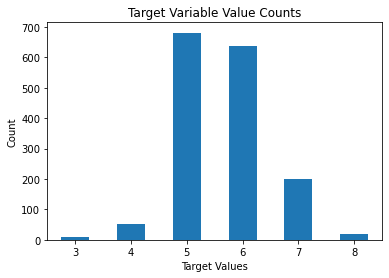

In [8]:
target_counts = df['quality'].value_counts()
target_counts.sort_index().plot(kind='bar')
plt.title('Target Variable Value Counts')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.xticks(rotation=0)

The plot above shows a clear imbalance in target classes. This must be taken into consideration while training the model.

## NULL VALUE ANALYSIS

In [9]:
# Null Value Analysis

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in any columns in the dataset. So, we now proceed with further analysis of the dataset.

## DATA DISTRIBUTION PLOTS

In [10]:
def describe_numeric(col):
    '''
    A generic function that takes in numeric column as input and generates a brief description of the dataset.
    '''
    print(col.describe())
    plt.hist(col)
    plt.show()

Description for column fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64


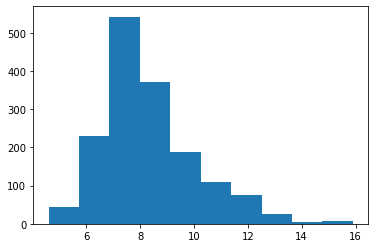



Description for column volatile acidity
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64


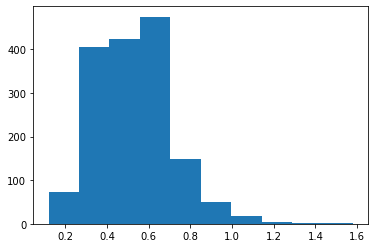



Description for column citric acid
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64


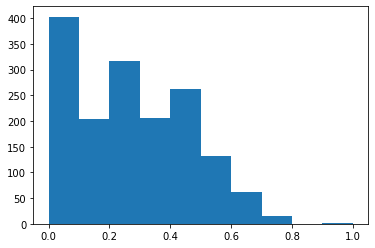



Description for column residual sugar
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64


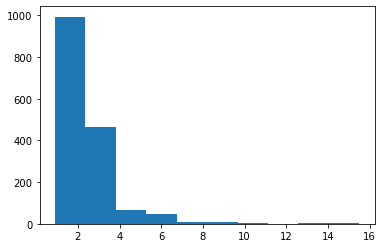



Description for column chlorides
count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64


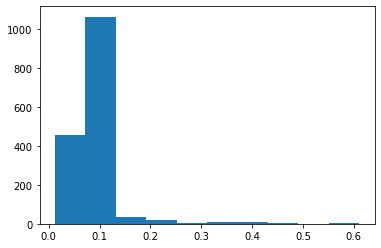



Description for column free sulfur dioxide
count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64


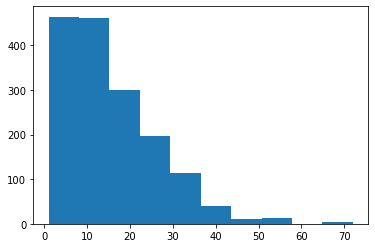



Description for column total sulfur dioxide
count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64


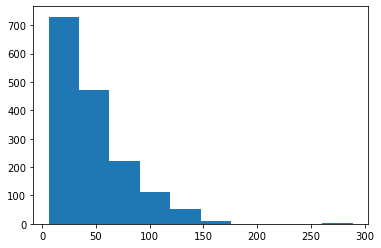



Description for column density
count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64


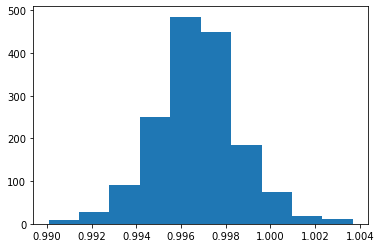



Description for column pH
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64


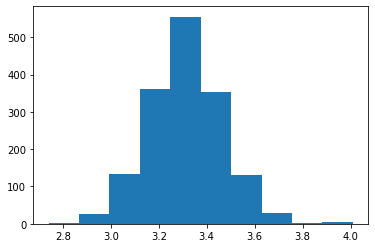



Description for column sulphates
count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64


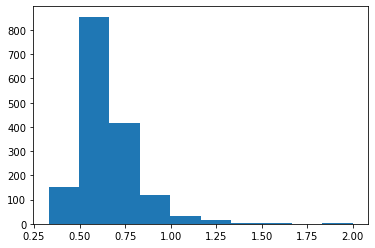



Description for column alcohol
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


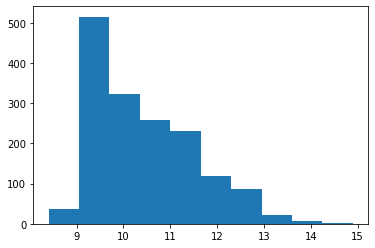



Description for column quality
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


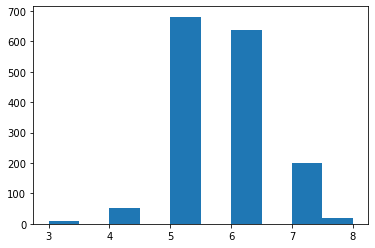

In [11]:
for col in df.columns:
    print("Description for column", col)
    if df[col].dtype == np.int64 or df[col].dtype == np.float64:
        describe_numeric(df[col])
    print("\n")

A view of the distributions of all data suggests that most of the features have a right skewed distribution. However, the remaining features have a normal distribution. The target variable, 'quality' is essentially a count plot because it is a categorical variable and it is not possible to check its distribution like we did with the other variables.

## CORRELATION ANALYSIS

In [23]:
correlation = df.corr()

In [24]:
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

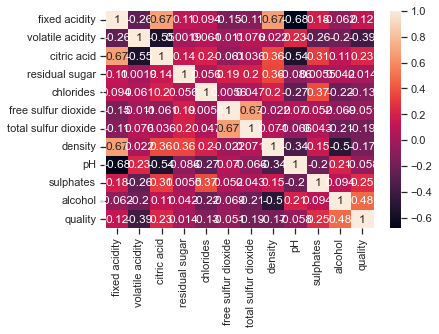

In [25]:
sns.heatmap(correlation, annot=True)

In [15]:
threshold = 0.5

# Dictionary to store high correlation columns for each column
high_corr_columns = {}

for column in correlation.columns:
    # Find columns with correlations above the threshold
    high_corr = correlation.index[correlation[column] > threshold].tolist()
    # Remove the current column itself from the list
    high_corr.remove(column)
    # Store the list of high correlation columns in the dictionary
    high_corr_columns[column] = high_corr

for column, high_corr in high_corr_columns.items():
    if high_corr:
        print(f"Columns highly correlated with '{column}': {', '.join(high_corr)}")
    else:
        print(f"No high correlation found for '{column}'.")


Columns highly correlated with 'fixed acidity': citric acid, density
No high correlation found for 'volatile acidity'.
Columns highly correlated with 'citric acid': fixed acidity
No high correlation found for 'residual sugar'.
No high correlation found for 'chlorides'.
Columns highly correlated with 'free sulfur dioxide': total sulfur dioxide
Columns highly correlated with 'total sulfur dioxide': free sulfur dioxide
Columns highly correlated with 'density': fixed acidity
No high correlation found for 'pH'.
No high correlation found for 'sulphates'.
No high correlation found for 'alcohol'.
No high correlation found for 'quality'.


We can now use this information to create pair plots for columns that have a relatively high correlation.

In [16]:
def create_pairplot(data, columns):
    """
    Create a pair plot for specified columns in a DataFrame.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        columns (list): A list of column names to include in the pair plot.

    Returns:
        None
    """

    # Create a pair plot for the specified columns
    sns.set(style="ticks")
    selected_df = data[columns]
    sns.pairplot(df, vars=selected_df, hue='quality')
    # , markers = ['.', 'o', '*', '^', 'v', 's']
    
    plt.show()


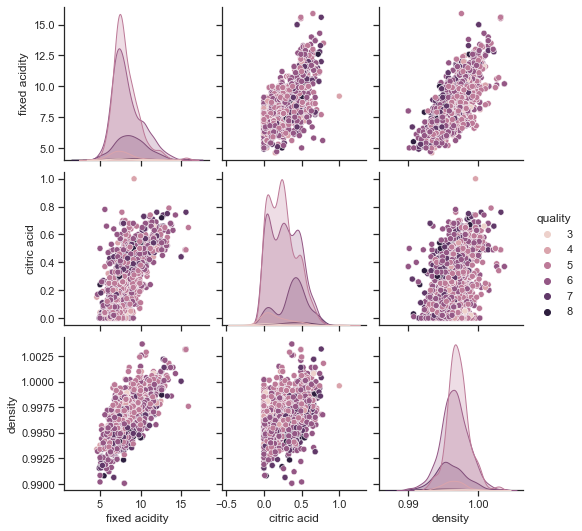

In [17]:
create_pairplot(df, ['fixed acidity', 'citric acid', 'density'])

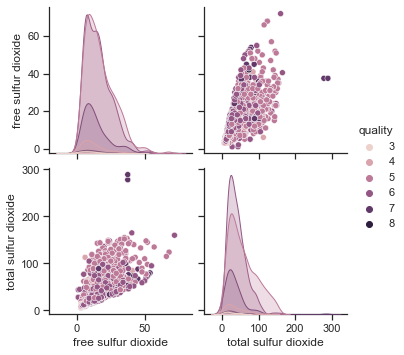

In [18]:
create_pairplot(df, ['free sulfur dioxide', 'total sulfur dioxide'])